In [1]:
import pandas as pd

C:\Users\Karan Mehta\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import nltk
import numpy as np
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [3]:
from pandarallel import pandarallel
import multiprocessing
import spacy
from wordcloud import WordCloud

In [4]:
df_plot = pd.read_parquet("C:/Users/Karan Mehta/Downloads/NLP Final/Datasets/FinalData.parquet", engine='pyarrow')
df_plot.head(5)

,date,title,text,year,cleaned,clean_title,ORG_Ent,sentiment,sentiment_score,Person_Ent,yelp_sent_score,sentiment_yelp,GPE_Ent,PROD_Ent
0,2020-02-26,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,2020,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,[LegalTech Artificial Intelligence Market Tec...,Positive,0.9991,"[Aristocrat Leisure, Thermo Fisher, Woodley Eq...","[0.9991054475349816, 0.000894552465018403]",Negative,"[Midmark, Medicatech, Everlaw, Lawgeex, LEVERT...",[Articles]
4,2020-08-07,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,2020,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,"[AI Express, PostBeyond BygoneEpic PowerIn Ret...",Negative,-0.9728,"[Kozhikode airportTop Toggle, Safari, safari,...","[0.9997745515347954, 0.00022544846520459693]",Negative,"[Dubai, Kozhikode]",[]
7,2021-02-25,MulticoreWare Inc. Becomes CEVA’s Trusted Part...,\n\nMulticoreWare Inc. Becomes CEVA’s Trusted ...,2021,MulticoreWare Inc. Becomes CEVA s Trusted Part...,MulticoreWare Inc. Becomes CEVA s Trusted Part...,"[MulticoreWare Inc., Trusted Partner for Imagi...",Positive,0.9981,"[Erez Natan, Soumendra Mohanty]","[0.9946702958949173, 0.005329704105082685]",Negative,"[SAN JOSE, Calif., CEVA, Deep Learning, CEVA, ...","[CEVA, CEVA, CEVA, CEVA, CEVA, CEVA, CEVA, CEV..."
8,2022-10-06,Healthcare Artificial Intelligence Market Anal...,\n\nHealthcare Artificial Intelligence Market ...,2022,Healthcare Artificial Intelligence Market Anal...,Healthcare Artificial Intelligence Market Anal...,[Healthcare Artificial Intelligence Market Ana...,Positive,0.9993,"[AiCure, Web , Profile Follow]","[0.08046707158729571, 0.9195329284127043]",Positive,"[New Jersey, USA, SBWire, Suraj, United States...",[Tables]
9,2020-04-29,Artificial Intelligence As A Service Market : ...,\n\nArtificial Intelligence As A Service Marke...,2020,Artificial Intelligence As A Service Market : ...,Artificial Intelligence As A Service Market : ...,"[Artificial Intelligence As A Service Market, ...",Positive,0.9996,"[Emerging Trends, IRIS AI, Get Sample PDF, Pur...","[0.959171258240741, 0.04082874175925896]",Negative,"[Bigml, H2o, Vietnam, China, Malaysia, Japan, ...","[Industry Trends, Industry Trends]"


In [5]:
df_plot['quarter'] = df_plot['date'].dt.year.astype(str) + ' Q' + df_plot['date'].dt.quarter.astype(str)

In [7]:
industry_jobs = {
    "Healthcare": [
        "Doctor",
        "Physician",
        "Nurse",
        "Pharmacist",
        "Physical Therapist",
        "Medical Laboratory Technician",
        "Healthcare Administrator",
        "Radiologist",
        "Occupational Therapist",
        "Dietitian",
        "Nutritionist",
        "Clinical Research Coordinator",
        "Healthcare Administrator",
        "Medical Assistant"
    ],
    
    "Finance": [
        "Financial Analyst",
        "Accountant",
        "Investment Banker",
        "Financial Planner",
        "Risk Manager",
        "Credit Analyst",
        "Portfolio Manager",
        "Auditor",
        "Actuary",
        "Tax Advisor",
        "Compliance Officer",
        "Wealth Manager",
        "Quantitative Analyst",
        "Trader",
        "Financial Controller",
        "Actuary",
        "Loan Officer",
        "Asset Manager",
        "Treasury Analyst",
        "Insurance Underwriter",
        "Finance Manager"
    ],
    
    "Cybersecurity": [
        "Security Analyst",
        "Penetration Tester",
        "Cybersecurity Consultant",
        "Information Security Manager",
        "Network Security Engineer",
        "Cryptographer",
        "Incident Responder",
        "Security Architect",
        "Forensic Computer Analyst",
        "Compliance Officer"
    ],
    
    "Technology": [
        "Software Engineer",
        "Software Developer",
        "UX/UI Designer",
        "Network Engineer",
        "Systems Analyst",
        "Web Developer",
        "Systems Administrator",
        "IT Support Specialist",
        "Technical Project Manager",
        "Database Administrator",
        "IT Project Manager",
        "Cloud Architect",
        "Solution Architect",
        "Network Administrator",
        "Data Scientist",
        "Cloud Engineer",
        "DevOps Engineer",
        "Data Analyst"
    ],
    "Cryptocurrency": [
        "Blockchain Developer",
        "Cryptocurrency Analyst",
        "Smart Contract Developer",
        "Cryptocurrency Miner",
        "Cryptocurrency Exchange Manager",
        "Compliance Specialist (Crypto)",
        "ICO Advisor",
        "Cryptocurrency Trader",
        "Wallet Developer",
        "Blockchain Consultant"
    ],
    "Microchips": [
        "CPU Design Engineer",
        "Hardware Engineer",
        "GPU Performance Analyst",
        "Deep Learning Engineer",
        "Firmware Developer",
        "Verification Engineer",
        "System Software Engineer",
        "Embedded Systems Engineer",
        "Hardware Design Engineer",
        "Product Marketing Manager (Graphics)"
        "Data Center Solutions Architect",
        "Technical Support Engineer",
        "SOC Architect",
        "Research Scientist (Semiconductor)"
        "Semiconductor Process Engineer",
        "Microchip Designer",
        "Quality Assurance Engineer (Microchips)",
        "Semiconductor Sales Manager",
        "Material Scientist",
        "Process Integration Engineer",
        "Equipment Engineer",
        "Yield Enhancement Engineer",
        "Test Engineer (Microchips)",
        "Product Manager (Microchips)"
    ],
    "Automobile": [
        "Automotive Engineer",
        "Mechanical Engineer (Automotive)",
        "Design Engineer (Automotive)",
        "Quality Assurance Engineer (Automotive)",
        "Production Manager (Automotive)",
        "Technician",
        "Automotive Sales Manager",
        "Supply Chain Manager (Automotive)",
        "Process Engineer (Automotive)",
        "Research and Development Engineer (Automotive)"
    ],
    "Education": [
        "Teacher",
        "Principal",
        "Academic Advisor",
        "Curriculum Developer",
        "Education Administrator",
        "Special Education Teacher",
        "Guidance Counselor",
        "Librarian",
        "Instructional Coordinator",
        "Tutor",
        "Lecturer"
    ]
}

def find_job_titles_and_industries(text):
    found_jobs = []
    found_industries = []
    for industry, jobs in industry_jobs.items():
        for job in jobs:
            if job.lower() in text.lower():  
                found_jobs.append(job)
                found_industries.append(industry)
                
    return ', '.join(found_jobs), ', '.join(found_industries)

df_plot[['Job_Titles', 'Industry']] = df_plot['cleaned'].apply(lambda x: pd.Series(find_job_titles_and_industries(x)))

In [8]:
df_plot[['Job_Titles', 'Industry']]

,Job_Titles,Industry
0,,
4,,
7,,
8,,
9,,
...,...,...
200429,Software Engineer,Technology
200430,,
200431,Trader,Finance
200433,Doctor,Healthcare


In [9]:
df_plot.head(5)

,date,title,text,year,cleaned,clean_title,ORG_Ent,sentiment,sentiment_score,Person_Ent,yelp_sent_score,sentiment_yelp,GPE_Ent,PROD_Ent,quarter,Job_Titles,Industry
0,2020-02-26,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,2020,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,[LegalTech Artificial Intelligence Market Tec...,Positive,0.9991,"[Aristocrat Leisure, Thermo Fisher, Woodley Eq...","[0.9991054475349816, 0.000894552465018403]",Negative,"[Midmark, Medicatech, Everlaw, Lawgeex, LEVERT...",[Articles],2020 Q1,,
4,2020-08-07,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,2020,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,"[AI Express, PostBeyond BygoneEpic PowerIn Ret...",Negative,-0.9728,"[Kozhikode airportTop Toggle, Safari, safari,...","[0.9997745515347954, 0.00022544846520459693]",Negative,"[Dubai, Kozhikode]",[],2020 Q3,,
7,2021-02-25,MulticoreWare Inc. Becomes CEVA’s Trusted Part...,\n\nMulticoreWare Inc. Becomes CEVA’s Trusted ...,2021,MulticoreWare Inc. Becomes CEVA s Trusted Part...,MulticoreWare Inc. Becomes CEVA s Trusted Part...,"[MulticoreWare Inc., Trusted Partner for Imagi...",Positive,0.9981,"[Erez Natan, Soumendra Mohanty]","[0.9946702958949173, 0.005329704105082685]",Negative,"[SAN JOSE, Calif., CEVA, Deep Learning, CEVA, ...","[CEVA, CEVA, CEVA, CEVA, CEVA, CEVA, CEVA, CEV...",2021 Q1,,
8,2022-10-06,Healthcare Artificial Intelligence Market Anal...,\n\nHealthcare Artificial Intelligence Market ...,2022,Healthcare Artificial Intelligence Market Anal...,Healthcare Artificial Intelligence Market Anal...,[Healthcare Artificial Intelligence Market Ana...,Positive,0.9993,"[AiCure, Web , Profile Follow]","[0.08046707158729571, 0.9195329284127043]",Positive,"[New Jersey, USA, SBWire, Suraj, United States...",[Tables],2022 Q4,,
9,2020-04-29,Artificial Intelligence As A Service Market : ...,\n\nArtificial Intelligence As A Service Marke...,2020,Artificial Intelligence As A Service Market : ...,Artificial Intelligence As A Service Market : ...,"[Artificial Intelligence As A Service Market, ...",Positive,0.9996,"[Emerging Trends, IRIS AI, Get Sample PDF, Pur...","[0.959171258240741, 0.04082874175925896]",Negative,"[Bigml, H2o, Vietnam, China, Malaysia, Japan, ...","[Industry Trends, Industry Trends]",2020 Q2,,


In [10]:
df_tmp1 = df_plot[['GPE_Ent','cleaned','quarter','sentiment_yelp','Job_Titles','PROD_Ent','ORG_Ent']]

In [11]:
df_tmp1.head(5)

,GPE_Ent,cleaned,quarter,sentiment_yelp,Job_Titles,PROD_Ent,ORG_Ent
0,"[Midmark, Medicatech, Everlaw, Lawgeex, LEVERT...",LegalTech Artificial Intelligence Market 2019 ...,2020 Q1,Negative,,[Articles],[LegalTech Artificial Intelligence Market Tec...
4,"[Dubai, Kozhikode]",Two dead as AI Express flight skids off Kozhik...,2020 Q3,Negative,,[],"[AI Express, PostBeyond BygoneEpic PowerIn Ret..."
7,"[SAN JOSE, Calif., CEVA, Deep Learning, CEVA, ...",MulticoreWare Inc. Becomes CEVA s Trusted Part...,2021 Q1,Negative,,"[CEVA, CEVA, CEVA, CEVA, CEVA, CEVA, CEVA, CEV...","[MulticoreWare Inc., Trusted Partner for Imagi..."
8,"[New Jersey, USA, SBWire, Suraj, United States...",Healthcare Artificial Intelligence Market Anal...,2022 Q4,Positive,,[Tables],[Healthcare Artificial Intelligence Market Ana...
9,"[Bigml, H2o, Vietnam, China, Malaysia, Japan, ...",Artificial Intelligence As A Service Market : ...,2020 Q2,Negative,,"[Industry Trends, Industry Trends]","[Artificial Intelligence As A Service Market, ..."


In [23]:
tmp = df_tmp1[['GPE_Ent','quarter','sentiment_yelp']]
plot_tmp = tmp.explode('GPE_Ent','quarter')
GPE_counts = plot_tmp['GPE_Ent'].value_counts()

In [35]:
neg_tmp = plot_tmp[plot_tmp['sentiment_yelp']=='Negative']

In [37]:
countries_of_interest = ['US', 'India', 'China', 'UK', 'Canada', 'Japan', 'Russia', 'Germany', 'France',
                           'New York', 'California', 'Israel', 'Australia', 'Italy',
                         'Brazil', 'Spain']

# Filter rows that contain the specified countries
filtered_neg_tmp = neg_tmp[neg_tmp['GPE_Ent'].isin(countries_of_interest)]

# Get value counts with respect to both 'GPE_Ent' and 'quarter'
value_counts = filtered_neg_tmp.groupby(['GPE_Ent', 'quarter']).size().reset_index(name='count')

# Display the result
value_counts

,GPE_Ent,quarter,count
0,Australia,2020 Q1,294
1,Australia,2020 Q2,283
2,Australia,2020 Q3,212
3,Australia,2020 Q4,367
4,Australia,2021 Q1,278
...,...,...,...
267,US,2023 Q1,5458
268,US,2023 Q2,10382
269,US,2023 Q3,8881
270,US,2023 Q4,8923


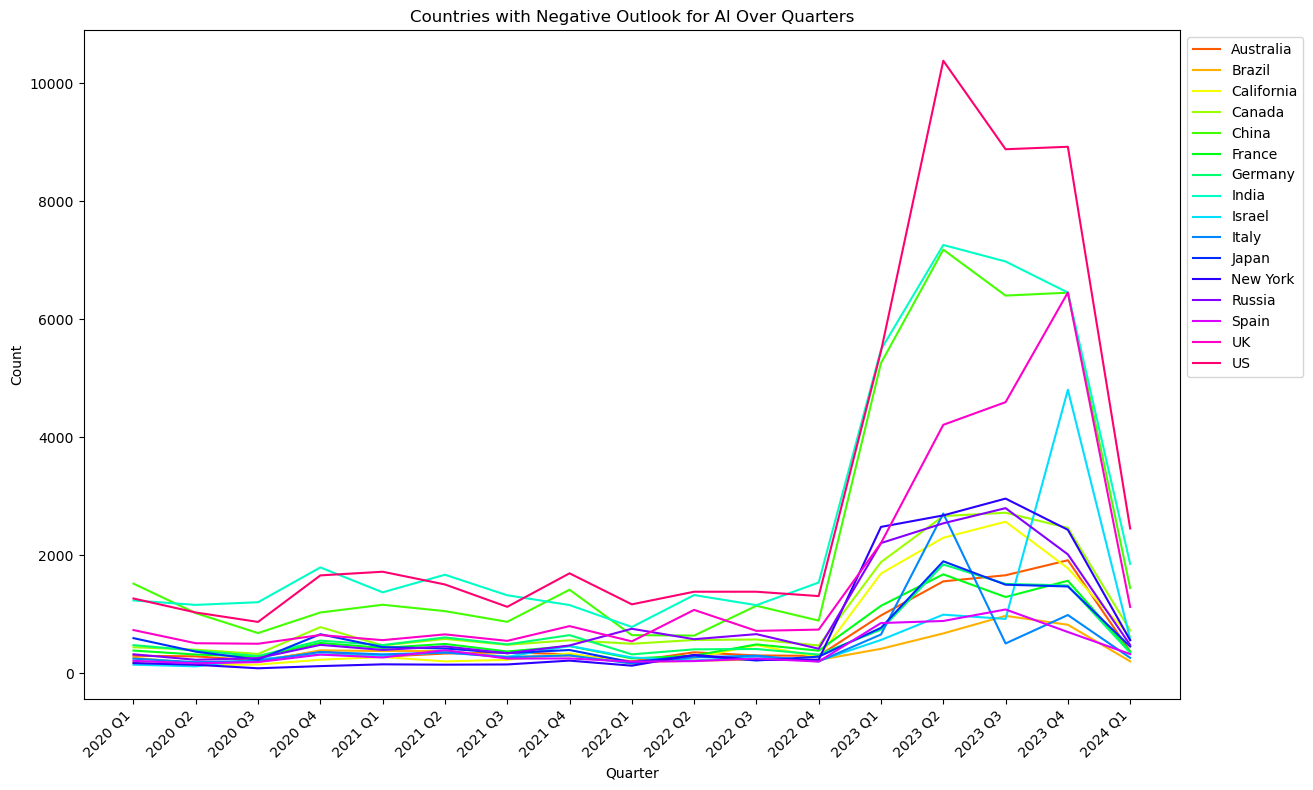

In [39]:
import seaborn as sns

palette = sns.color_palette("hsv", len(countries_of_interest))

plt.figure(figsize=(12, 8))

# Create a line plot using seaborn with the defined palette
sns.lineplot(x='quarter', y='count', hue='GPE_Ent', data=value_counts, palette=palette)

# Set the title and labels
plt.title('Countries with Negative Outlook for AI Over Quarters')
plt.xlabel('Quarter')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.show()

In [42]:
tmp = df_tmp1[['PROD_Ent','quarter','sentiment_yelp']]
plot_tmp = tmp.explode('PROD_Ent','quarter')
PROD_counts = plot_tmp['PROD_Ent'].value_counts()

In [50]:
PROD_counts[:50]

PROD_Ent
Twitter                                            17218
Altman                                              5388
CRM                                                 3363
Excel                                               2994
JavaScript                                          2855
DeepMind                                            2440
Discovery                                           2009
Fortune 500                                         1991
Learn                                               1523
H100                                                1413
Cancel                                              1347
Analysis                                            1342
Llama 2                                             1184
K-12                                                1106
A100                                                1044
RentLabor IssuesTrouble                             1016
Google Plus                                          964
Windows 11            

In [55]:
plot_tmp1 = plot_tmp[plot_tmp['sentiment_yelp'].isin(['Positive', 'Negative'])]

In [56]:
technologies = [
    'Excel',
    'DeepMind',
    'Llama 2',
    'GPT-4',
    'Google Cloud',
    'DeepBrain AI',
    'Aetina',
    'Claude',
    'Bard',
    'ChatGPT',
    'Google Plus',
    'SageMaker',
    'Anthropic',
]



# Filter rows that contain the specified countries
filtered_tmp = plot_tmp1[plot_tmp1['PROD_Ent'].isin(technologies)]

# Get value counts with respect to both 'GPE_Ent' and 'quarter'
value_counts = filtered_tmp.groupby(['PROD_Ent', 'sentiment_yelp']).size().reset_index(name='count')

# Display the result
value_counts

,PROD_Ent,sentiment_yelp,count
0,Aetina,Negative,30
1,Aetina,Positive,342
2,Anthropic,Negative,6
3,Bard,Negative,4
4,Bard,Positive,3
5,Claude,Negative,430
6,Claude,Positive,95
7,DeepBrain AI,Negative,125
8,DeepBrain AI,Positive,370
9,DeepMind,Negative,1480


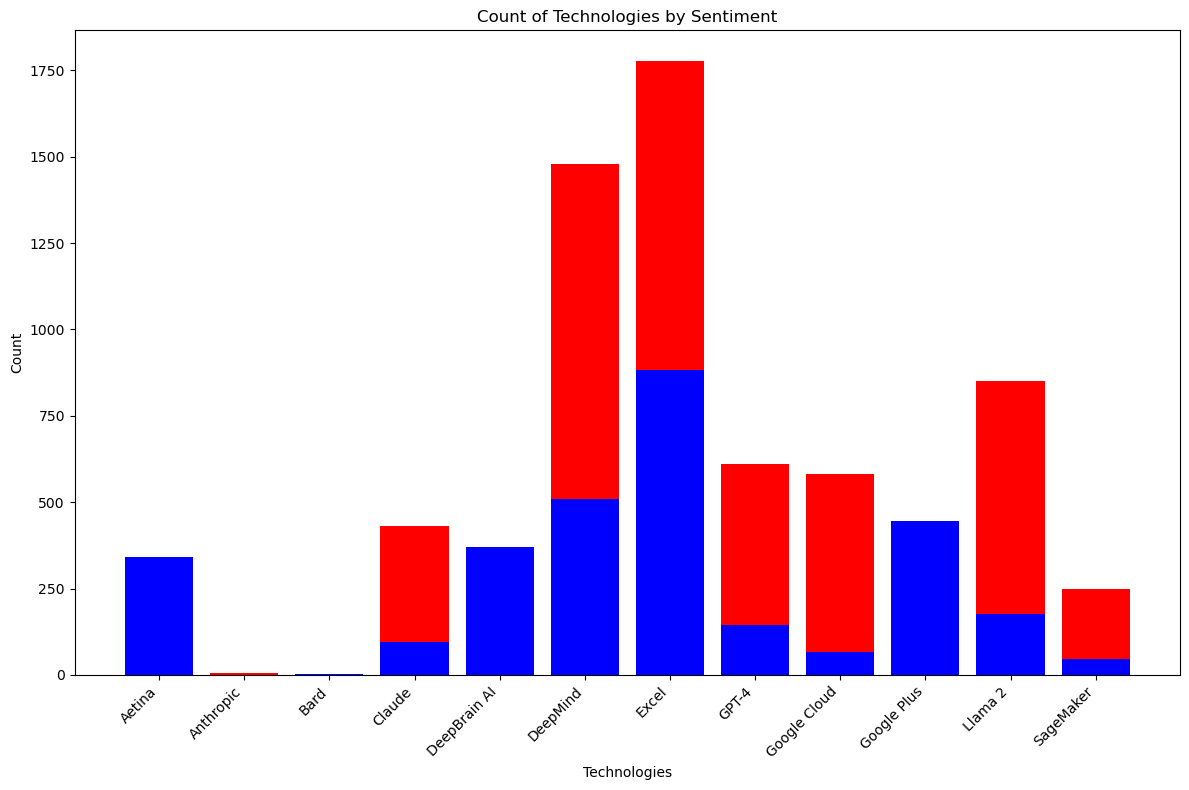

In [57]:
import matplotlib.pyplot as plt

# Create a bar plot for value counts of technologies by sentiment
plt.figure(figsize=(12, 8))
plt.bar(value_counts['PROD_Ent'], value_counts['count'], color=value_counts['sentiment_yelp'].map({'Positive': 'blue', 'Negative': 'red'}))

# Add labels and title
plt.xlabel('Technologies')
plt.ylabel('Count')
plt.title('Count of Technologies by Sentiment')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

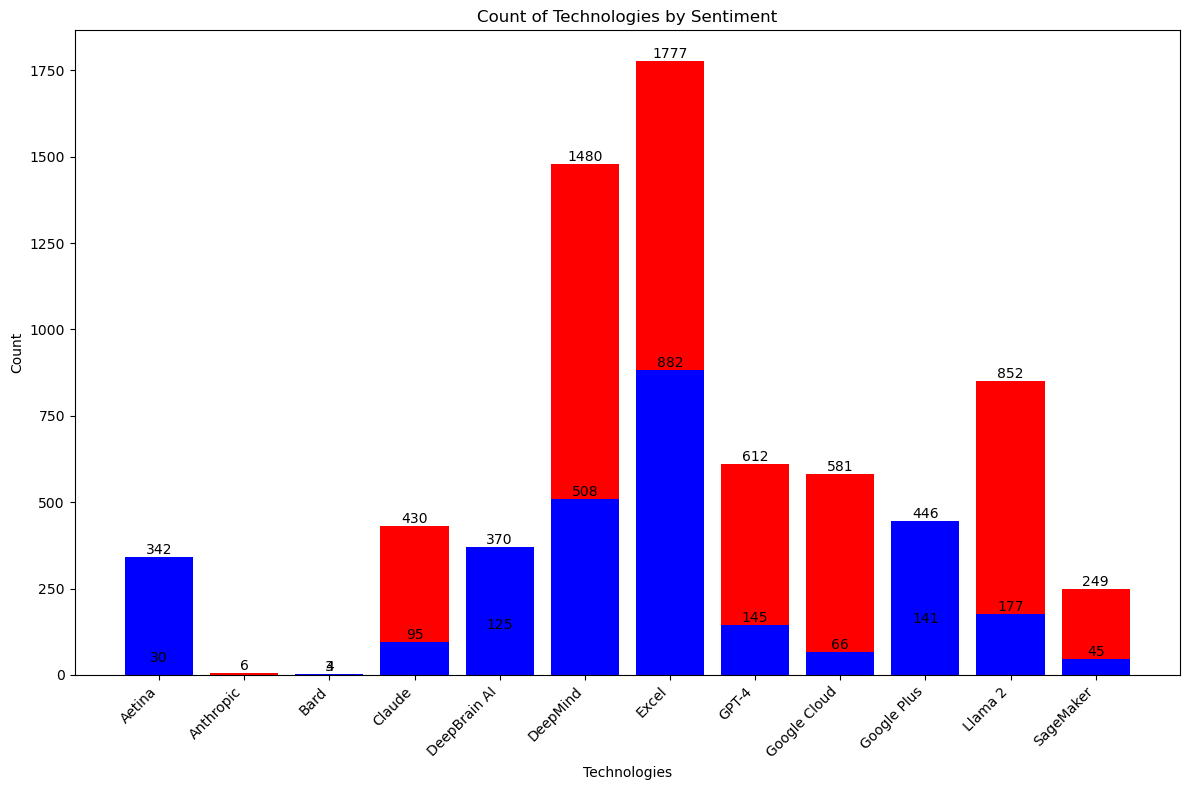

In [59]:
plt.figure(figsize=(12, 8))
bars = plt.bar(value_counts['PROD_Ent'], value_counts['count'], color=value_counts['sentiment_yelp'].map({'Positive': 'blue', 'Negative': 'red'}))

# Add counts on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

# Add labels and title
plt.xlabel('Technologies')
plt.ylabel('Count')
plt.title('Count of Technologies by Sentiment')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

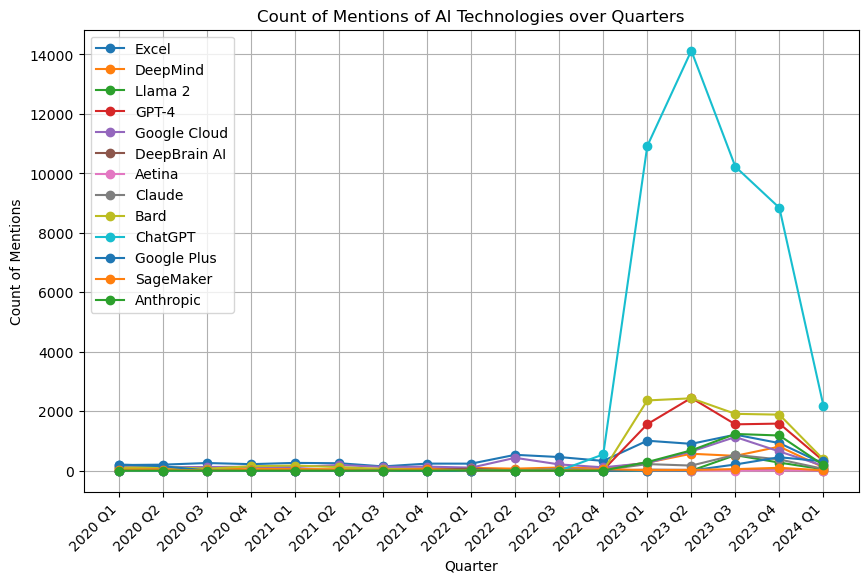

In [47]:
technologies = [
    'Excel',
    'DeepMind',
    'Llama 2',
    'GPT-4',
    'Google Cloud',
    'DeepBrain AI',
    'Aetina',
    'Claude',
    'Bard',
    'ChatGPT',
    'Google Plus',
    'SageMaker',
    'Anthropic',
]

for tech in technologies:
    df_tmp1[tech] = df_tmp1['cleaned'].apply(lambda x: 1 if tech in x else 0)

# Create a line plot for count of mentions of each person over quarters
plt.figure(figsize=(10, 6))
for tech in technologies:
    tech_mentions = df_tmp1.groupby('quarter')[tech].sum()
    plt.plot(tech_mentions.index, tech_mentions.values, marker='o', label=tech)

plt.title('Count of Mentions of AI Technologies over Quarters')
plt.xlabel('Quarter')
plt.ylabel('Count of Mentions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()